# Traffic Accident EDA

Exploratory analysis of a Traffic Accident Dataset focusing on time, location, and crash severity patterns.

In [1]:
# Importing Liabraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## Loading Dataset

In [3]:
# Loading the CSV file into a Pandas Dataframe:
df= pd.read_csv("traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",FOLLOWING TOO CLOSELY,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,"OVER $1,500",UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [5]:
df.shape

(209306, 24)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0


In [7]:
# Finding the null(NaN) values:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [8]:
# Total number of accidents:
df.shape[0]

209306

A total of 209,306 accidents were recorded in the dataset.

## Cleaning the Dataset

In [9]:
df['crash_date']= pd.to_datetime(df['crash_date'], format= '%m/%d/%Y %I:%M:%S %p', errors='coerce') # Fixing the date and time format

df['crash_date'].min(), df['crash_date'].max() # To find Dataset set time span

(Timestamp('2013-03-03 16:48:00'), Timestamp('2025-01-18 00:17:00'))

The Dataset spans from `03-03-2013` to `18-01-2025`

In [10]:
# Determine whether the crash occurred on a weekend (Saturday/Sunday) or a weekday:
df['is_weekend']= np.where(df['crash_date'].dt.weekday >= 5, 'Weekend', 'Weekday')

In [11]:
df['injuries_fatal'].gt(0).value_counts() # Fatal vs non-fatal injuries 

injuries_fatal
False    208955
True        351
Name: count, dtype: int64

The `crash_day_of_week` column was numerical and did not distinctly identify weekends.
For recreating accurately, the identification on weekends is implemented by retrieving directly from `crash_date` using datetime properties.

### Time Analysis

1. Accidents by Hour of Day

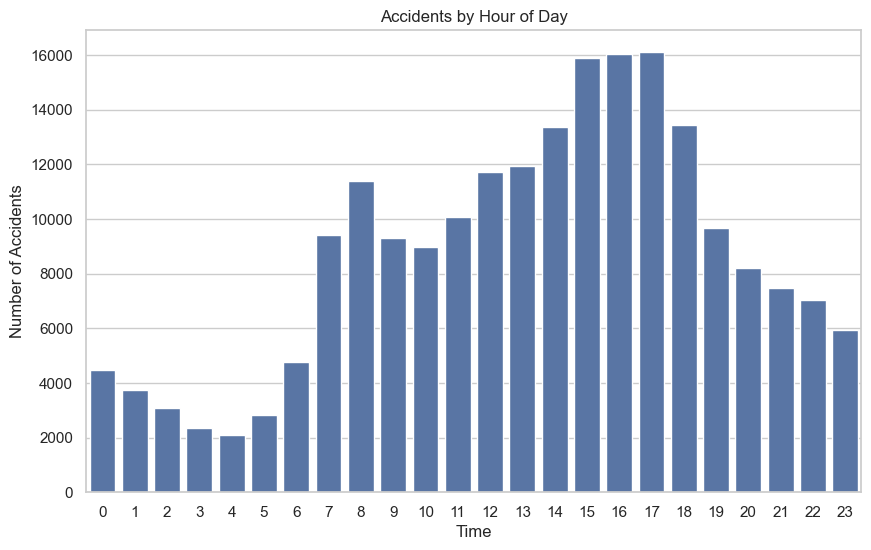

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='crash_hour', data=df)
plt.title("Accidents by Hour of Day")
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.show()

Most accidents occures between 15:00 and 17:00, indicating the end of **end of the work day**.

2. Weekday vs weekend accidents

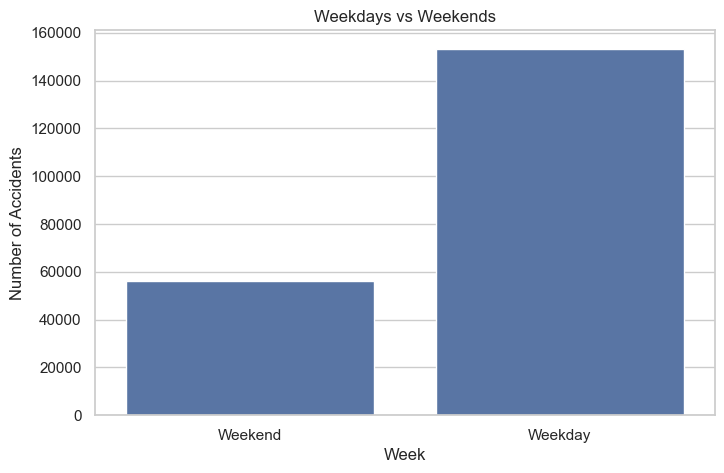

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x= 'is_weekend', data=df)
plt.title("Weekdays vs Weekends")
plt.xlabel("Week")
plt.ylabel('Number of Accidents')
plt.show()

Most accidents occur on **Weekdays**, likely due to heavy traffic volumes.

3. Accidents by month

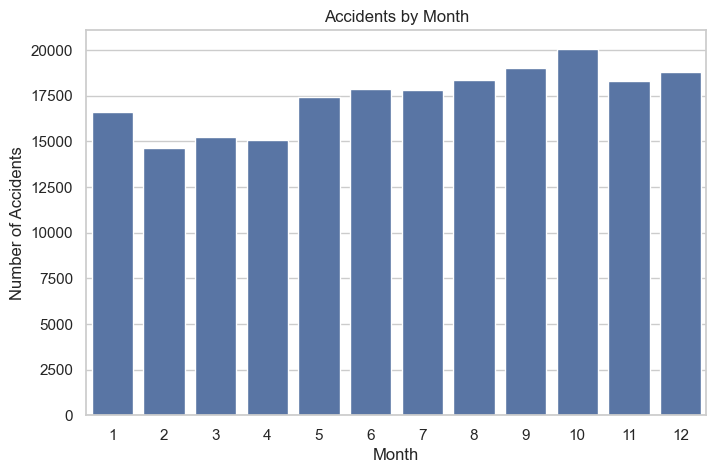

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='crash_month', data=df, order= range(1,13))
plt.title("Accidents by Month")
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

When analyzing accidents by **Month**, `10`(*October*) records slightly higher accident frequency compared to other months.

### Accident by Lightning Condition

This analysis evaluates the frequency of accidents and the lighting conditions that result in greater risk visibility scenarios.

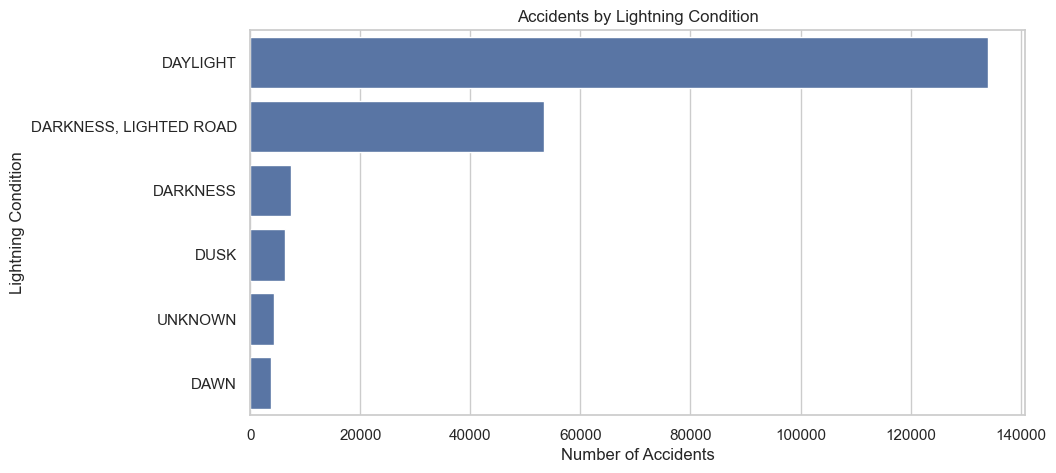

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='lighting_condition', order=df['lighting_condition'].value_counts().index)
plt.title("Accidents by Lightning Condition")
plt.xlabel('Number of Accidents')
plt.ylabel('Lightning Condition')
plt.show()

Most accidents occurred during **Daylight**, followed by **Dark** conditions with street lighting, suggesting that traffic volume plays a major role alongside visibility.

### Accidents by Weather Condition

This analysis evaluates the frequency of accidents and the `weather_conditions` that result in greater risk visibility scenarios.

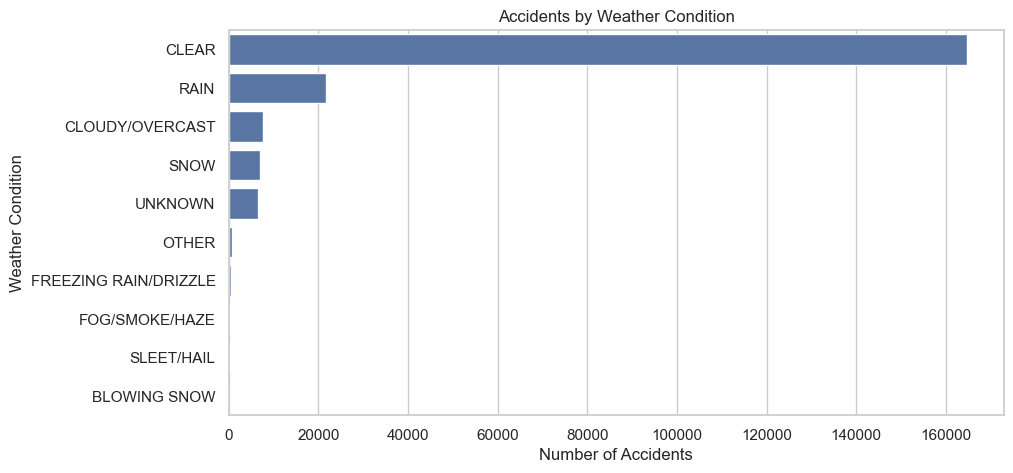

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='weather_condition', order=df['weather_condition'].value_counts().head(10).index)
plt.title("Accidents by Weather Condition")
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

Most accidents occurred during **Clear** weather, followed by **Rain**, suggesting that traffic volume plays a major role alongside visibility.

### Accidents by Roadway Surface Condition

This section explores how road surface conditions relate to accident occurrence.

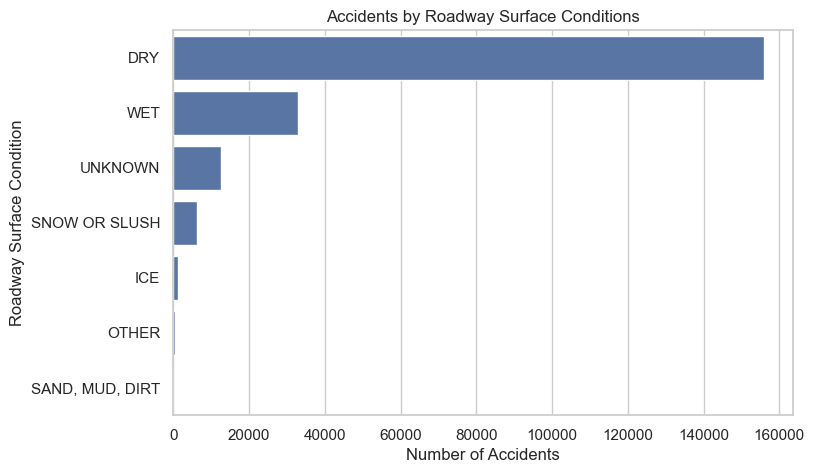

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df,y='roadway_surface_cond', order=df['roadway_surface_cond'].value_counts().index)
plt.title("Accidents by Roadway Surface Conditions")
plt.xlabel('Number of Accidents')
plt.ylabel('Roadway Surface Condition')
plt.show()

Most of the accidents occurred on **Dry** roads. This shows that higher exposure to traffic rather than the conditions of the roads contributes the most to the number of accidents that occurred.

### Distribution of Accident Severity

This analysis shows the distribution of accidents based on the most severe injury reported.

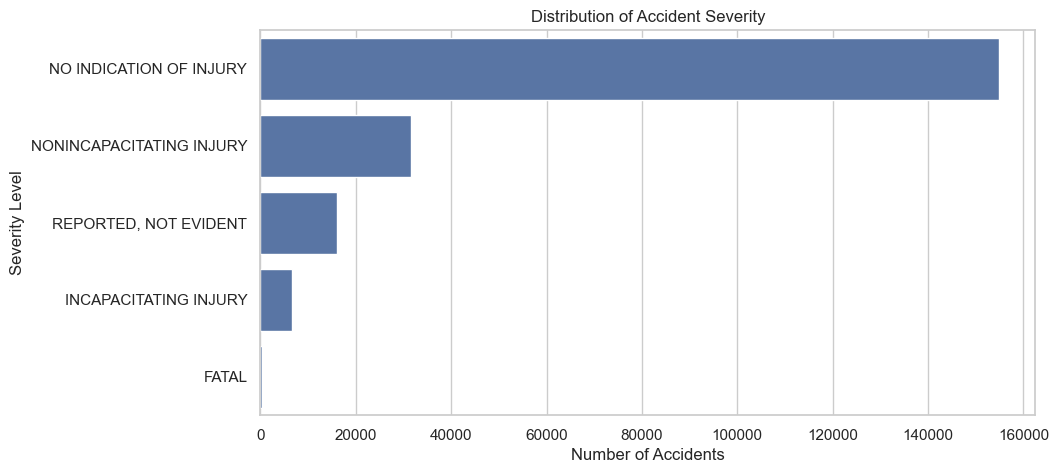

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='most_severe_injury', order=df['most_severe_injury'].value_counts().index)
plt.title('Distribution of Accident Severity')
plt.xlabel('Number of Accidents')
plt.ylabel('Severity Level')
plt.show()

The majority of accidents caused no injuries or minor injuries, and fatal and disabling injuries were a small percentage of the accidents.

### Top Contributing causes

This analysis shows the prime contributory causes of accidents occured

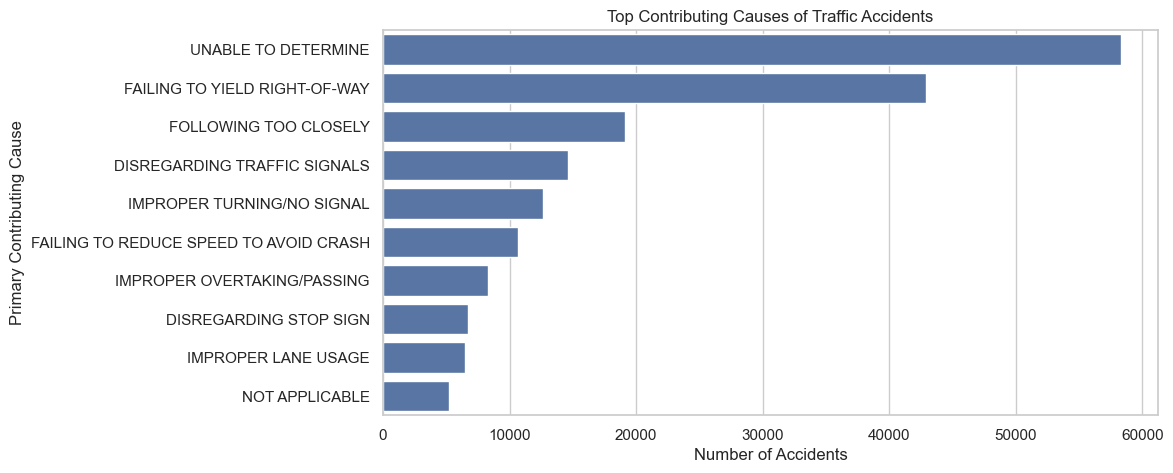

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='prim_contributory_cause', order=df['prim_contributory_cause'].value_counts().head(10).index)
plt.title("Top Contributing Causes of Traffic Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Primary Contributing Cause")
plt.show()

The driver factors, including **failure to yield** and **following too closely**, emerged most often as a reported contribution. The association of these factors and the accident has been presented without any direct causality.

### Conclusion

This EDA was focused on understanding the Traffic Crash Dataset and explore the analysis of real-world issues associated with road safety and crash incidents that occur on the roads worldwide. The analysis includes focusing only on the valid data set for obtaining insights.

The data showed that there were patterns in terms of factors like time, location, and crash severity, indicating that traffic crashes are influenced by recurring conditions and human-related factors. Some trends indicated that crashes follow patterns under similar circumstances.

In conclusion, this project has shown how data from actual traffic collision data can be cleaned and analyzed to reveal valuable insights. It is important to understand the significance of data preparation before conducting any analyses, as it greatly affects the outcome of the analyses.

#### Special Note
This project is part of my learning journey in data analysis.  
Any suggestions, feedback, or improvements are welcome and appreciated.

— **Ghost**